In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2025-05-23 02:34:59.232289: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747964099.251783  385996 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747964099.257369  385996 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747964099.275345  385996 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747964099.275387  385996 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747964099.275389  385996 computation_placer.cc:177] computation placer alr

In [2]:
df = pd.read_csv("BankRecords.csv")

In [3]:
df.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

Before further exploation, I decided to rename the dataframe columns to make them easier to work with

In [5]:
df.columns = [
    'id', 'age', 'experience', 'income', 'sort_code', 'family',
    'credit_score', 'education', 'mortgage', 'personal_loan',
    'securities_account', 'cd_account', 'online_banking', 'credit_card'
]


In [6]:
df.describe()

,id,age,experience,income,sort_code,family,credit_score,mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


The descriptive statistic above has showed something strange in the experience column, negative values.

It is not possible to have negative values in this column, so I decided to explore more by printing the unique values and displaying all the rows (52).

In [7]:
print(df['experience'].unique())
print("Number of row with negative experience:", len(df[df['experience'] < 0]))

[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
Number of row with negative experience: 52


In [8]:
df[df['experience'] < 0]

,id,age,experience,income,sort_code,family,credit_score,education,mortgage,personal_loan,securities_account,cd_account,online_banking,credit_card
89,90,25,-1,113,94303,4,2.300000,Masters,0,No,No,No,No,Yes
226,227,24,-1,39,94085,2,1.700000,Degree,0,No,No,No,No,No
315,316,24,-2,51,90630,3,0.300000,Masters,0,No,No,No,Yes,No
451,452,28,-2,48,94132,2,1.750000,Masters,89,No,No,No,Yes,No
524,525,24,-1,75,93014,4,0.200000,Diploma,0,No,No,No,Yes,No
536,537,25,-1,43,92173,3,2.400000,Degree,176,No,No,No,Yes,No
540,541,25,-1,109,94010,4,2.300000,Masters,314,No,No,No,Yes,No
576,577,25,-1,48,92870,3,0.300000,Masters,0,No,No,No,No,Yes
583,584,24,-1,38,95045,2,1.700000,Degree,0,No,No,No,Yes,No
597,598,24,-2,125,92835,2,7.200000,Diploma,0,No,Yes,No,No,Yes


After inspection, most of the persons with a negative experience are young, aged between 23 and 29. A reasonable age for someone finishing college with a range of 1-3 years of experience.

Since the other columns were coherent all together and nothing looked strange, this increases the possibility of the - sign being added by mistake so I decided to reverse the negative values to positive.

In [9]:
# Flip all negative experience values to positive
df['experience'] = df['experience'].apply(lambda x: -x if x < 0 else x)

In [10]:
df['bank_code'] = df['sort_code'].astype(str).str[:2]
df['bank_code'] = df['bank_code'].astype(int)

In [11]:
df.head()

,id,age,experience,income,sort_code,family,credit_score,education,mortgage,personal_loan,securities_account,cd_account,online_banking,credit_card,bank_code
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No,91
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No,90
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No,94
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No,94
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes,91


In [12]:
correlation = df['bank_code'].corr(df["income"], method='pearson')
print("Pearson correlation:", correlation)

Pearson correlation: -0.028900023071394925


Before proceeding to medelling, I decided to remove 2 columns:
- The first is the ID column, as it's random and not relevant to the predict income.
- The second is the sort code, knowing your bank/branch wouldn't help much in predcting income. Even though customers with similar income range may prefer certain banks which may include some influence, but as shown above there is no relationship between banks and incomes so I will get rid of it.

In [13]:
df = df.drop(columns=['id','sort_code','bank_code'])

We also have a strong correlation between age and experience which will cause some redundancy and noise in our prediction, that is why I decided 

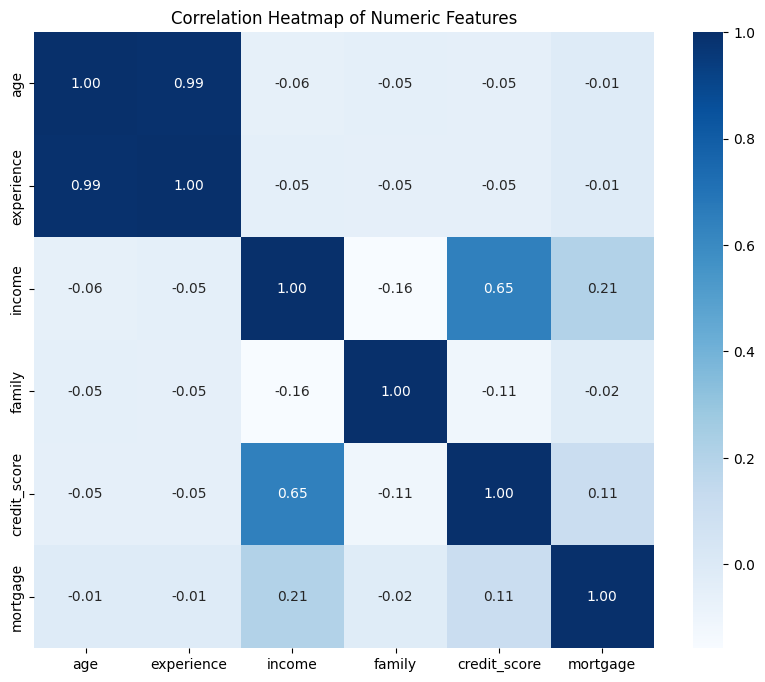

In [14]:
# Extracting numeric values only
df_numeric = df.select_dtypes(include=['int64', 'float64'])


corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

We see above that there is a strong correlation between age and experience. Given that experience had negative values earlier on, I decided to drop it as it's redundant with age, and may cause some unnecessary noise to the model.

In [15]:
df = df.drop(columns='experience')

Now we take a look at the categorical columns, we see that education had 3 different categories and all the other columns were binary (Yes or No), so we need to encode them.

I have used boolean operators (True = Yes, No = False) for the binary columns and I used one-hot encoding for the education.

In [16]:
# binary columns' names
binary_cols = ['personal_loan', 'securities_account', 'cd_account', 'online_banking', 'credit_card']

# Mapping the values to boolean
for col in binary_cols:
    df[col] = df[col].map({'Yes': True, 'No': False})


In [17]:
# One-hot encoding for education
df_clean = pd.get_dummies(df, columns=['education'])
df_clean

,age,income,family,credit_score,mortgage,personal_loan,securities_account,cd_account,online_banking,credit_card,education_Degree,education_Diploma,education_Masters
0,25,49,4,1.6,0,False,True,False,False,False,False,True,False
1,45,34,3,1.5,0,False,True,False,False,False,False,True,False
2,39,11,1,1.0,0,False,False,False,False,False,False,True,False
3,35,100,1,2.7,0,False,False,False,False,False,True,False,False
4,35,45,4,1.0,0,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,0,False,False,False,True,False,False,False,True
4996,30,15,4,0.4,85,False,False,False,True,False,False,True,False
4997,63,24,2,0.3,0,False,False,False,False,False,False,False,True
4998,65,49,3,0.5,0,False,False,False,True,False,True,False,False


In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5000 non-null   int64  
 1   income              5000 non-null   int64  
 2   family              5000 non-null   int64  
 3   credit_score        5000 non-null   float64
 4   mortgage            5000 non-null   int64  
 5   personal_loan       5000 non-null   bool   
 6   securities_account  5000 non-null   bool   
 7   cd_account          5000 non-null   bool   
 8   online_banking      5000 non-null   bool   
 9   credit_card         5000 non-null   bool   
 10  education_Degree    5000 non-null   bool   
 11  education_Diploma   5000 non-null   bool   
 12  education_Masters   5000 non-null   bool   
dtypes: bool(8), float64(1), int64(4)
memory usage: 234.5 KB


As we can see below, the values are in different ranges so we would need to scale them. The columns are not normally distributed and there are some skewness and We are having outliers especially for mortgage column so we will be using robust scaler as it is performs better against outliers.

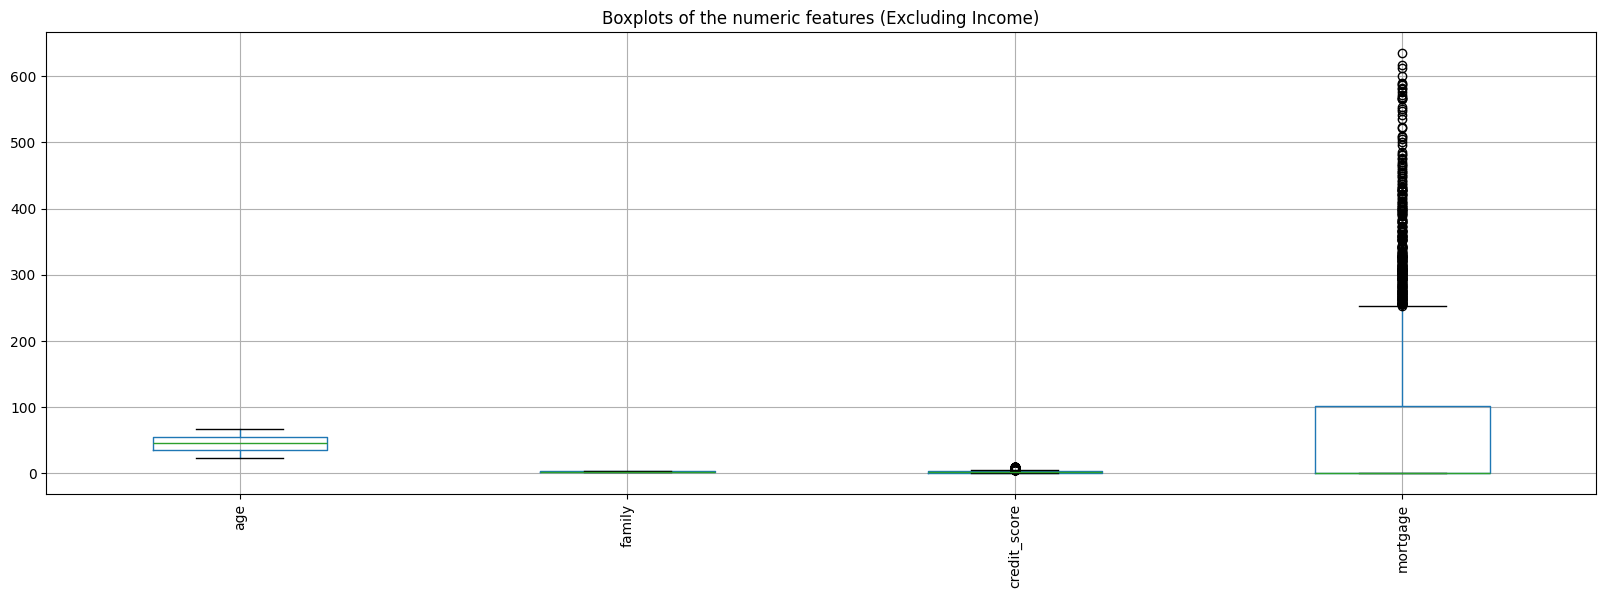

In [19]:
df_numeric = df_clean.select_dtypes(include=['int64', 'float64']).drop(columns='income')

## Boxplot of all features
df_numeric.boxplot(figsize=(20, 6), rot=90)
plt.title('Boxplots of the numeric features (Excluding Income)')
plt.show()

In [20]:
scaler = RobustScaler()
columns= df_numeric.columns
df_numeric = scaler.fit_transform(df_numeric)
df_numeric = pd.DataFrame(df_numeric, columns=columns)

This is how the data became after scaling, This is shown for visualisation purposes and I will be scaling after splitting the data to avoid data leakage which occurs when information that would not be available at prediction time is used when building the model (scikit-learn, 2025).


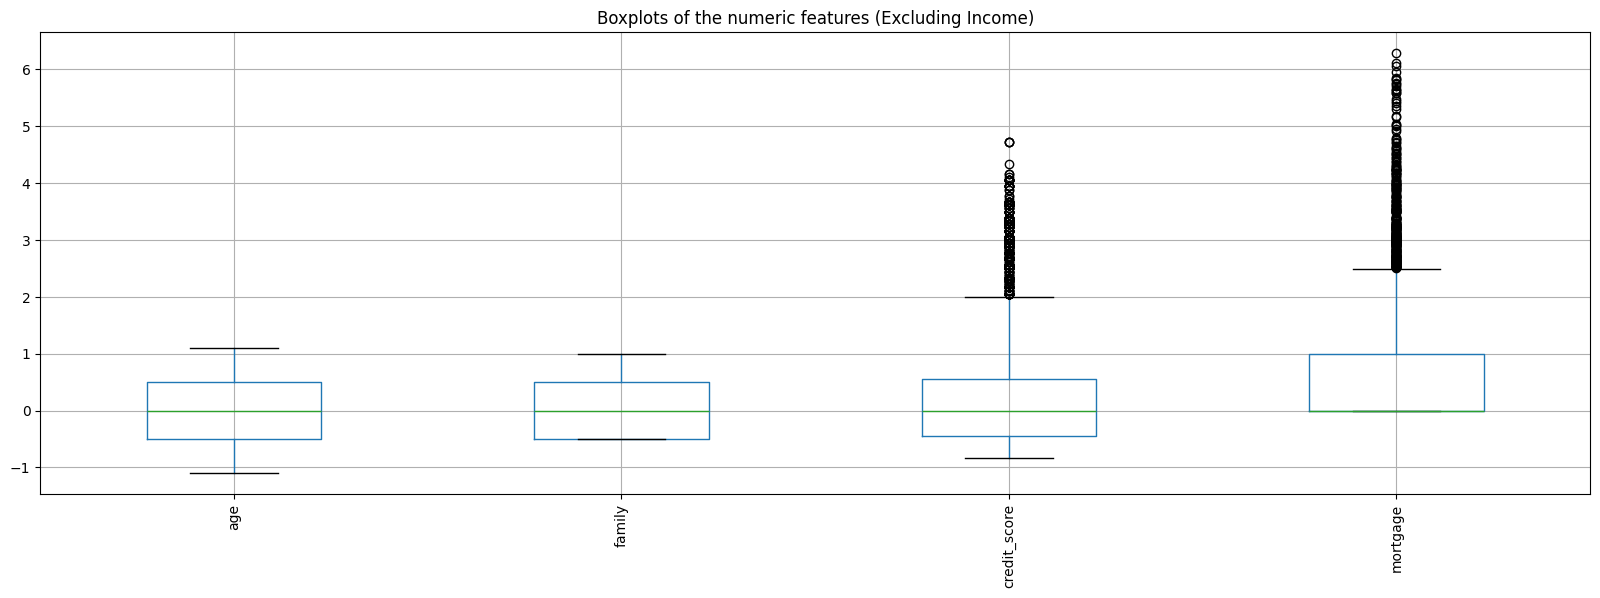

In [21]:
df_numeric.boxplot(figsize=(20, 6), rot=90)
plt.title('Boxplots of the numeric features (Excluding Income)')
plt.show()

## Data splitting

In [22]:
X = df_clean.drop(columns='income')
y = df_clean['income']

In [23]:
# Splitting data into training and testing sets (80/20)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state = 11)

In [24]:
# numerical columns list
num_cols = df_numeric.columns.to_list()


preprocessor = ColumnTransformer([
    ('num', scaler, num_cols)
], remainder= 'passthrough' ) # We only scale the numerical values, categorical variables are already encoded and they shouldn't be scaled


X_train = preprocessor.fit_transform(X_train)
X_test= preprocessor.transform(X_test)



## Base Neural network

In [25]:
model = Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    Dense(64, activation = 'relu'), # First hidden layer with relu activation
    Dense(32, activation = 'relu'), # Second hidden layer
    Dense(1) # Output layer
])
# Compile the model using Adam optimizer
model.compile(optimizer = 'adam',loss='mse', metrics=['mae'])
# Training the model for 100 epochs, batch size of 64 and 20% validation split
model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=100,
          batch_size=64,
          verbose=1)        



I0000 00:00:1747964102.534835  385996 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5564 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/100


I0000 00:00:1747964104.271543  386080 service.cc:152] XLA service 0x7f490000cc70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747964104.271579  386080 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti Laptop GPU, Compute Capability 8.6
2025-05-23 02:35:04.294554: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747964104.410377  386080 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-05-23 02:35:05.253042: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_277', 4 bytes spill stores, 4 bytes spill loads



38/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7691.1694 - mae: 73.9527

I0000 00:00:1747964105.823782  386080 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 7609.4062 - mae: 73.5179 - val_loss: 7027.3037 - val_mae: 70.9551
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6554.2104 - mae: 67.0196 - val_loss: 4763.1533 - val_mae: 55.4288
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3904.8838 - mae: 47.9345 - val_loss: 1853.5022 - val_mae: 32.3058
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1713.0280 - mae: 30.9286 - val_loss: 1388.9152 - val_mae: 29.5132
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1328.9066 - mae: 28.0993 - val_loss: 1235.5800 - val_mae: 27.9210
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1207.3175 - mae: 26.6151 - val_loss: 1146.0022 - val_mae: 26.9508
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1092.6372 - mae: 25.6547 - val_loss: 1092.2046 - val_mae: 26.2569
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1029.2473 - mae: 24.7704 - val_loss: 1049.0844 - val_mae: 26.0151
Epoch 9/100

In [26]:
y_pred= model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
R²: 0.6308341026306152


# References:
scikit-learn. (2025). 10. Common pitfalls and recommended practices. [online] Available at: https://scikit-learn.org/stable/common_pitfalls.html#how-to-avoid-data-leakage.
‌